In [231]:
import pandas as pds
import numpy as npy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import random
from sklearn.metrics import r2_score

import seaborn as sea
import matplotlib.pyplot as plt

In [232]:
import warnings
def warn (*args, **kwargs):
    pass
warnings.warn = warn

In [236]:
dataset = load_iris ()
dataset.keys ()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [237]:
df = pds.DataFrame (data=dataset.data, columns=dataset.feature_names)
df['species'] = dataset.target
df.tail ()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
145        2  
146        2  
147        2  
148        2  
149        2

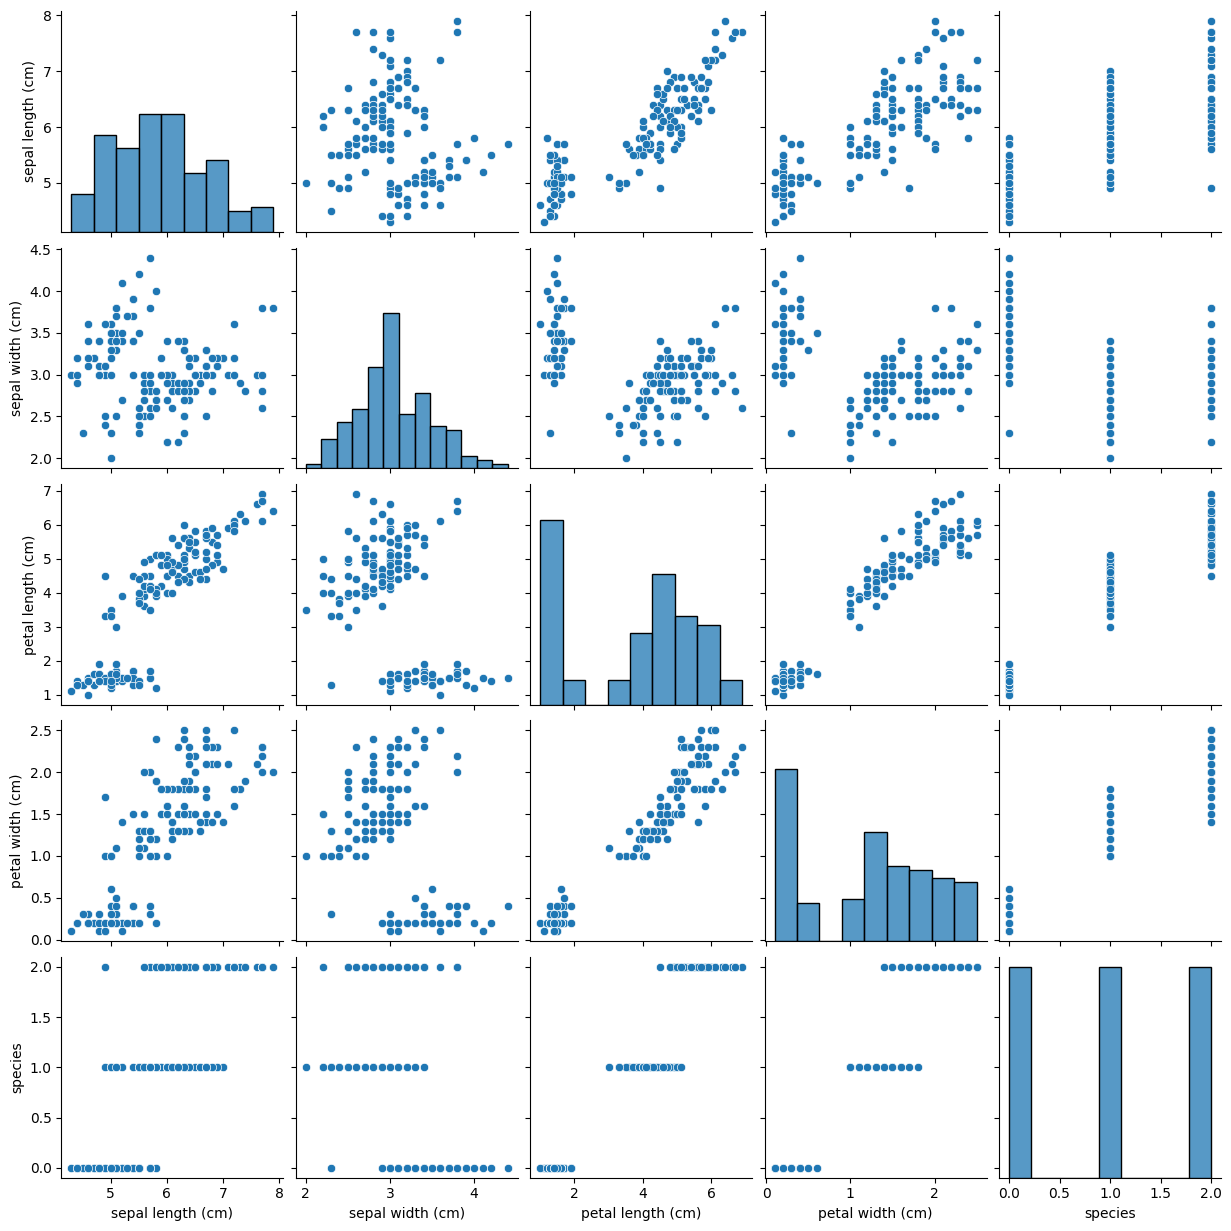

In [238]:
sea.pairplot (df)

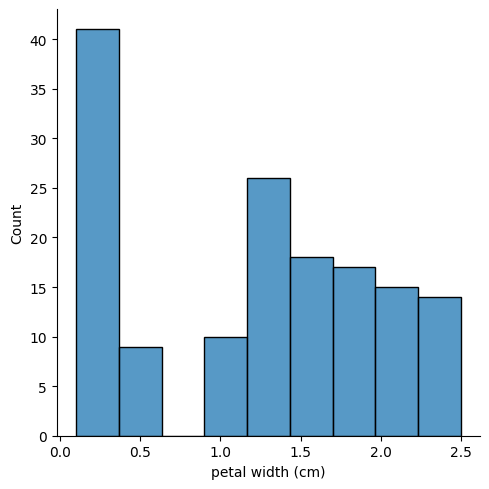

In [239]:
sea.displot (df['petal width (cm)'])

In [240]:
species_corr = df.corr ()['species'][:-1]
required_features = species_corr[abs (species_corr) > 0.4].index.to_list ()
required_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<Axes: ylabel='species'>

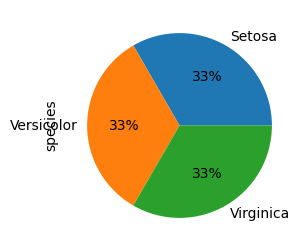

In [241]:
flowers = pd.value_counts (df.species)
labels = ['Setosa', 'Versicolor', 'Virginica']
flowers.plot (kind='pie', labels=labels, figsize=(4, 3), autopct='%1.0f%%')

<Axes: >

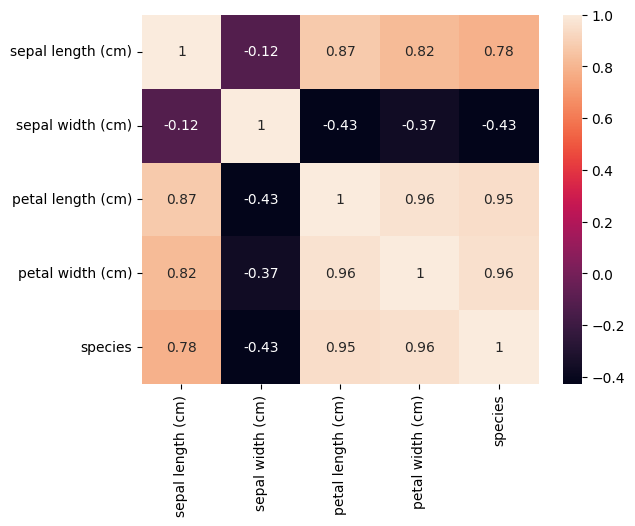

In [242]:
sea.heatmap (df.corr (), annot=True)

In [243]:
X = df[required_features]
yhat = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split (X, yhat, test_size=0.3, random_state=1)

In [244]:
model = LogisticRegression ()
model.fit (X_train, y_train)

LogisticRegression()

In [245]:
y_pred = model.predict (X_test)
r2_score (y_pred, y_test)

0.9642857142857143

In [246]:
flower_map = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

In [ ]:
random_index = random.randint (0, len (df))
print (f"actual: {flower_map [df.iloc[random_index]['species']]}\npredicted: {flower_map[model.predict ([df.iloc[random_index][required_features]])[0]]}")

actual: setosa
predicted: setosa
